<a href="https://colab.research.google.com/github/Ronak1998/Model_outputs/blob/master/Refg_combine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# univariate cnn lstm example
import tensorflow.compat.v1 as tf
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import keras.utils

Using TensorFlow backend.


In [0]:
import pandas as pd
import time
from datetime import date, time, timedelta
import numpy as np
from numpy import asarray
from numpy import save
from sklearn import preprocessing
from google.colab import drive

In [3]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [4]:
file = r'/gdrive/My Drive/Colab Notebooks/NILM/REDDhouse1_lowf_VA.csv'
df1 = pd.read_csv(file)
print(df1)

        TimeStamp    MAIN   OVEN   REFG  ...   BATH   HEAT   STOV   DIFF
0       1303132933    340      0      6  ...      1      0      0     79
1       1303132936    342      0      6  ...      1      0      0     81
2       1303132940    341      0      6  ...      1      0      0     79
3       1303132943    341      0      6  ...      1      0      0     79
4       1303132946    340      0      6  ...      1      0      0     79
...            ...    ...    ...    ...  ...    ...    ...    ...    ...
406743  1306266980    273      0    186  ...      1      0      0     31
406744  1306266983    273      0    187  ...      1      0      0     33
406745  1306266987    273      0    190  ...      1      0      0     30
406746  1306266990    273      0    189  ...      1      0      0     31
406747  1306266994    273      0    186  ...      1      0      0     32

[406748 rows x 13 columns]


In [5]:
file = r'/gdrive/My Drive/Colab Notebooks/NILM/REDDhouse2_lowf_VA.csv'
df2 = pd.read_csv(file)
print(df2)

        TimeStamp    MAIN   KTCH   LITE  ...   REFG   DISH   GARB   DIFF
0       1303104700     37      5      8  ...      6      1      0      8
1       1303104704     37      4      8  ...      6      0      0      8
2       1303104707     37      5      8  ...      6      1      0      8
3       1303104710     37      3      8  ...      7      0      0     10
4       1303104725     37      4      8  ...      7      1      0      8
...            ...    ...    ...    ...  ...    ...    ...    ...    ...
316835  1306108734    262      2      9  ...    159      0      0     87
316836  1306108737    263      2      8  ...    158      0      0     91
316837  1306108741    262      2      9  ...    158      0      0     88
316838  1306108744    263      2      9  ...    160      0      0     88
316839  1306108748    262      2      9  ...    157      0      0     90

[316840 rows x 11 columns]


In [6]:
file = r'/gdrive/My Drive/Colab Notebooks/NILM/REDDhouse3_lowf_VA.csv'
df3 = pd.read_csv(file)
print(df3)

        TimeStamp    MAIN   UNKN   LITE  ...   SMOK   BATH   KTCH   DIFF
0       1302930690    758     29    400  ...      2      0      0     75
1       1302930693    757     26    400  ...      2      0      0     78
2       1302930696    759     26    401  ...      2      0      0     80
3       1302930700    759     27    400  ...      1      0      0     78
4       1302930703    754     26    400  ...      2      0      0     75
...            ...    ...    ...    ...  ...    ...    ...    ...    ...
376145  1306801163   1377      1    159  ...      0      0      2     59
376146  1306801166   1377      1    159  ...      0      0      2     53
376147  1306801170   1377      1    159  ...      0      0      2     50
376148  1306801173   1377      1    159  ...      0      0      2     51
376149  1306801176   1377      1    159  ...      0      0      2     56

[376150 rows x 15 columns]


In [7]:
file = r'/gdrive/My Drive/Colab Notebooks/NILM/REDDhouse4_lowf_VA.csv'
df4 = pd.read_csv(file)
print(df4)

        TimeStamp    MAIN   LITE   FURN  ...   SMOK   DISH   BATH   DIFF
0       1303002992    548    243     70  ...      0      0      0     88
1       1303002995    548    244     70  ...      0      0      0     90
2       1303002998    548    243     71  ...      0      0      0     85
3       1303003002    548    241     69  ...      0      0      0     91
4       1303003005    549    241     70  ...      1      0      0     92
...            ...    ...    ...    ...  ...    ...    ...    ...    ...
428071  1307148325    494    178     52  ...      0      0      1     82
428072  1307148328    493    177     53  ...      0      0      0     81
428073  1307148331    497    173     52  ...      0      0      1     88
428074  1307148335    495    174     52  ...      0      0      1     88
428075  1307148338    494    175     52  ...      0      0      1     81

[428076 rows x 14 columns]


In [8]:
file = r'/gdrive/My Drive/Colab Notebooks/NILM/REDDhouse5_lowf_VA.csv'
df5 = pd.read_csv(file)
print(df5)

       TimeStamp    MAIN   MICR   LITE  ...   ELEC   KTCH   OUTD   DIFF
0      1303100647    311      4     71  ...      7      0      0     39
1      1303100651    312      4     71  ...      7      0      0     38
2      1303100654    312      3     71  ...     10      0      0     35
3      1303100658    311      4     71  ...      7      0      0     37
4      1303100661    311      4     71  ...      7      0      0     41
...           ...    ...    ...    ...  ...    ...    ...    ...    ...
77446  1306887599    189      3    102  ...      7      0      0     46
77447  1306887603    188      3    110  ...      5      0      0     42
77448  1306887607    188      3    120  ...      5      0      0     32
77449  1306887610    187      3    105  ...      5      0      0     45
77450  1306887614    186      3    102  ...      5      0      0     48

[77451 rows x 17 columns]


In [9]:
file = r'/gdrive/My Drive/Colab Notebooks/NILM/REDDhouse6_lowf_VA.csv'
df6 = pd.read_csv(file)
print(df6)

        TimeStamp    MAIN   KTCH   DRYR  ...   HEAT   LITE   AIRC   DIFF
0       1306006791    301      5      2  ...     88    124      4     45
1       1306006797    303      6      3  ...     94    116      4     48
2       1306006800    301      5      3  ...     95    116      4     45
3       1306006804    301      6      2  ...     94    116      4     46
4       1306006807    302      6      3  ...     94    115      4     48
...            ...    ...    ...    ...  ...    ...    ...    ...    ...
192187  1308013940    418      4      3  ...      8    113      4     51
192188  1308013943    418      5      3  ...      7    114      4     56
192189  1308013945    420      5      3  ...      7    114      4     55
192190  1308013953    419      5      3  ...      7    113      4     53
192191  1308013956    418      4      3  ...      7    113      4     53

[192192 rows x 14 columns]


In [10]:
array = df1.to_numpy()
dataset = pd.DataFrame({'timestamp': array[:,0], 'Main': array[:,1], 'Oven': array[:,2], 'Refg': array[:,3], 'Dish': array[:,4], 'Kitch': array[:,5], 'Lite': array[:,6], 'Dryr': array[:,7], 'Micr': array[:,8], 'Bath': array[:,9], 'Heat': array[:,10], 'Stov': array[:,11],'Diff': array[:,12]})
dataset = dataset.set_index(['timestamp'])
dataset.index = pd.to_datetime(dataset.index, unit='s')
dataset = dataset.resample('1min').mean()
dataset = dataset.dropna()
dataset.describe()

,Main,Oven,Refg,Dish,Kitch,Lite,Dryr,Micr,Bath,Heat,Stov,Diff
count,26297.000000,26297.000000,26297.000000,26297.000000,26297.000000,26297.000000,26297.000000,26297.000000,26297.000000,26297.000000,26297.000000,26297.000000
mean,382.908284,13.731572,54.990180,25.396969,57.172662,74.117537,35.850292,22.183838,7.003494,0.127257,0.114912,92.219572
std,747.425265,211.077353,85.166772,149.214637,87.244082,64.251739,288.437464,147.068870,91.989994,0.946020,0.799245,334.331542
min,90.666667,0.000000,0.500000,0.000000,40.266667,0.333333,0.000000,1.687500,0.000000,0.000000,0.000000,0.800000
25%,136.875000,0.000000,6.312500,0.000000,43.125000,3.200000,0.000000,4.000000,1.000000,0.000000,0.000000,32.687500
50%,175.812500,0.000000,6.750000,0.000000,44.000000,81.500000,0.000000,4.000000,1.000000,0.000000,0.000000,37.375000
75%,349.312500,0.000000,101.750000,0.000000,46.000000,84.400000,0.000000,4.000000,1.000000,0.000000,0.000000,54.000000
max,11556.250000,4156.625000,437.800000,1153.066667,2725.600000,418.666667,3251.812500,1771.250000,1664.187500,19.600000,16.333333,3378.937500


In [11]:
array = df2.to_numpy()
dataset2 = pd.DataFrame({'timestamp': array[:,0], 'Main': array[:,1], 'Kitch': array[:,2], 'Lite': array[:,3], 'Stov': array[:,4], 'Micr': array[:,5], 'Dryr': array[:,6], 'Refg': array[:,7], 'Dish': array[:,8], 'Garb': array[:,9], 'Diff': array[:,10]})
dataset2 = dataset2.set_index(['timestamp'])
dataset2.index = pd.to_datetime(dataset2.index, unit='s')
dataset2 = dataset2.resample('1min').mean()
dataset2 = dataset2.dropna()
dataset2.describe()

,Main,Kitch,Lite,Stov,Micr,Dryr,Refg,Dish,Garb,Diff
count,20034.000000,20034.000000,20034.000000,20034.000000,20034.000000,20034.000000,20034.000000,20034.000000,20034.000000,20034.000000
mean,229.984131,16.477641,26.610907,1.445228,15.354206,2.139669,79.745037,8.968314,0.081752,79.161377
std,242.080390,81.116853,45.811541,17.794712,95.882085,0.640812,85.827320,94.953205,1.542877,119.124760
min,31.000000,0.000000,2.000000,0.000000,1.562500,0.000000,1.562500,0.000000,0.000000,6.375000
25%,37.000000,1.062500,8.000000,0.062500,4.062500,2.000000,6.125000,0.000000,0.000000,14.312500
50%,255.547917,1.562500,8.625000,0.500000,4.625000,2.000000,7.000000,0.062500,0.000000,61.000000
75%,284.820772,14.125000,9.000000,0.937500,5.000000,2.250000,160.750000,0.076923,0.000000,91.500000
max,2761.937500,1079.250000,185.400000,411.000000,1926.000000,8.812500,598.187500,1255.562500,115.750000,1032.875000


In [12]:
array = df3.to_numpy()
dataset3 = pd.DataFrame({'timestamp': array[:,0], 'Main': array[:,1], 'Unkn': array[:,2], 'Lite': array[:,3], 'Elec': array[:,4], 'Refg': array[:,5], 'Garb': array[:,6], 'Dish': array[:,7], 'Furn': array[:,8], 'Dryr': array[:,9], 'Micr': array[:,10], 'Smok': array[:,11], 'Bath': array[:,12], 'Kitch': array[:,13], 'Diff': array[:,14]})
dataset3 = dataset3.set_index(['timestamp'])
dataset3.index = pd.to_datetime(dataset3.index, unit='s')
dataset3 = dataset3.resample('1min').mean()
dataset3 = dataset3.dropna()
dataset3.describe()

,Main,Unkn,Lite,Elec,Refg,Garb,Dish,Furn,Dryr,Micr,Smok,Bath,Kitch,Diff
count,24601.000000,24601.000000,24601.000000,24601.000000,24601.000000,24601.000000,24601.000000,24601.000000,24601.000000,24601.000000,24601.000000,24601.000000,24601.000000,24601.000000
mean,447.379797,7.096696,92.309104,103.809414,47.611646,0.089100,7.327249,15.351069,81.092320,8.539994,0.933422,16.130884,14.365813,52.723086
std,681.983342,32.362128,149.225450,56.256691,65.031417,1.148753,65.342533,81.029227,524.849764,92.172310,0.585150,138.707971,71.056528,52.612943
min,84.875000,0.000000,0.000000,40.533333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.437500
25%,142.428571,0.000000,1.000000,78.461538,0.187500,0.000000,0.812500,5.000000,0.000000,2.000000,0.875000,0.000000,2.000000,28.937500
50%,250.800000,0.375000,1.000000,90.312500,1.000000,0.000000,1.000000,5.000000,0.000000,2.000000,1.000000,0.000000,2.000000,32.187500
75%,457.666667,1.615385,171.125000,109.812500,115.937500,0.000000,1.000000,5.000000,0.000000,2.000000,1.000000,0.000000,7.000000,53.812500
max,7377.437500,924.666667,1380.466667,1161.000000,497.428571,141.625000,763.357143,747.000000,4894.875000,1768.800000,10.066667,1634.733333,1935.800000,786.687500


In [13]:
array = df4.to_numpy()
dataset4 = pd.DataFrame({'timestamp': array[:,0], 'Main': array[:,1], 'Lite': array[:,2], 'Furn': array[:,3], 'Kitch': array[:,4], 'Unkn': array[:,5], 'Dryr': array[:,6], 'Stov': array[:,7], 'Airc': array[:,8], 'Misc': array[:,9], 'Smok': array[:,10], 'Dish': array[:,11], 'Bath': array[:,12], 'Diff': array[:,13]})
dataset4 = dataset4.set_index(['timestamp'])
dataset4.index = pd.to_datetime(dataset4.index, unit='s')
dataset4 = dataset4.resample('1min').mean()
dataset4 = dataset4.dropna()
dataset4.describe()

,Main,Lite,Furn,Kitch,Unkn,Dryr,Stov,Airc,Misc,Smok,Dish,Bath,Diff
count,27255.000000,27255.000000,27255.000000,27255.000000,27255.000000,27255.000000,27255.000000,27255.000000,27255.000000,27255.000000,27255.000000,27255.000000,27255.000000
mean,341.022644,21.501753,158.940320,66.263147,0.425396,6.495058,9.158460,0.177530,1.165254,0.035537,9.064347,1.111297,66.684545
std,304.681641,53.323840,203.043973,80.575761,0.961250,49.402285,61.697756,1.850858,0.212853,0.190730,105.365385,15.989902,43.635330
min,68.066667,0.000000,27.000000,0.400000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,12.562500
25%,125.875000,0.000000,55.125000,7.062500,0.000000,0.266667,5.000000,0.000000,1.062500,0.000000,0.000000,0.375000,42.437500
50%,241.500000,0.000000,64.812500,15.562500,0.000000,0.750000,5.000000,0.000000,1.125000,0.000000,0.000000,0.812500,47.812500
75%,414.483333,0.066667,122.375000,138.594118,0.000000,0.937500,5.000000,0.000000,1.250000,0.000000,0.133333,1.250000,82.289583
max,3535.437500,311.500000,1379.866667,602.866667,7.437500,833.250000,1982.812500,57.000000,9.000000,6.000000,1362.687500,1151.562500,674.812500


In [14]:
array = df5.to_numpy()
dataset5 = pd.DataFrame({'timestamp': array[:,0], 'Main': array[:,1], 'Micr': array[:,2], 'Lite': array[:,3], 'Unkn': array[:,4], 'Furn': array[:,5], 'Dryr': array[:,6], 'Subp': array[:,7], 'Heat': array[:,8], 'Bath': array[:,9], 'Refg': array[:,10], 'Dish': array[:,11], 'Garb': array[:,12], 'Elec': array[:,13], 'Kitch': array[:,14], 'Outd': array[:,15], 'Diff': array[:,16]})
dataset5 = dataset5.set_index(['timestamp'])
dataset5.index = pd.to_datetime(dataset5.index, unit='s')
dataset5 = dataset5.resample('1min').mean()
dataset5 = dataset5.dropna()
dataset5.describe()

,Main,Micr,Lite,Unkn,Furn,Dryr,Subp,Heat,Bath,Refg,Dish,Garb,Elec,Kitch,Outd,Diff
count,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000,5216.000000
mean,640.598597,10.286787,136.405628,12.161388,51.562637,0.239719,61.871334,54.699168,3.502206,69.463592,10.688107,0.056673,17.147918,6.274978,0.035011,206.203452
std,999.229857,26.897406,154.004115,29.500239,167.983097,1.046608,145.418567,291.657709,59.776274,88.908105,104.594612,0.569400,25.074834,65.787831,0.337886,617.151566
min,163.400000,1.000000,68.000000,3.000000,0.000000,0.000000,16.200000,0.000000,0.000000,0.000000,0.000000,0.000000,4.142857,0.000000,0.000000,14.692308
25%,182.733333,3.000000,71.928571,3.437500,6.000000,0.000000,17.000000,0.000000,1.000000,0.133333,1.000000,0.000000,6.857143,0.000000,0.000000,37.875000
50%,311.581250,3.687500,73.800000,3.875000,6.000000,0.000000,19.000000,0.000000,1.000000,0.733333,1.000000,0.000000,7.000000,0.000000,0.000000,62.866667
75%,535.985714,6.067857,74.812500,4.000000,6.187500,0.000000,20.600000,0.000000,1.000000,160.812500,1.000000,0.000000,15.125000,0.127083,0.000000,68.533333
max,6312.133333,422.285714,811.285714,330.125000,888.714286,6.875000,1820.800000,2105.357143,1612.266667,493.062500,1288.733333,7.000000,472.866667,959.600000,5.000000,3023.428571


In [15]:
array = df6.to_numpy()
dataset6 = pd.DataFrame({'timestamp': array[:,0], 'Main': array[:,1], 'Kitch': array[:,2], 'Dryr': array[:,3], 'Stov': array[:,4], 'Elec': array[:,5], 'Bath': array[:,6], 'Refg': array[:,7], 'Dish': array[:,8], 'Unkn': array[:,9], 'Heat': array[:,10], 'Lite': array[:,11], 'Airc': array[:,12], 'Diff': array[:,13]})
dataset6 = dataset6.set_index(['timestamp'])
dataset6.index = pd.to_datetime(dataset6.index, unit='s')
dataset6 = dataset6.resample('1min').mean()
dataset6 = dataset6.dropna()
dataset6.describe()

,Main,Kitch,Dryr,Stov,Elec,Bath,Refg,Dish,Unkn,Heat,Lite,Airc,Diff
count,18550.000000,18550.000000,18550.000000,18550.000000,18550.000000,18550.000000,18550.000000,18550.000000,18550.000000,18550.000000,18550.000000,18550.000000,18550.000000
mean,476.163052,7.647669,2.581146,4.461009,5.092700,3.953739,75.708210,0.238557,43.378926,20.873836,110.211802,126.346932,75.668526
std,597.761896,26.054808,0.337132,57.388952,53.919898,19.401404,75.099786,0.539375,84.172771,34.960668,28.038063,517.979869,46.011852
min,159.428571,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.750000,64.875000,3.000000,39.444444
25%,216.333333,5.875000,2.333333,2.000000,0.000000,3.083333,0.333333,0.000000,0.000000,7.555556,71.200000,4.000000,56.547980
50%,334.866667,6.000000,2.555556,2.250000,0.000000,3.500000,114.687500,0.083333,0.000000,8.000000,116.384615,4.000000,65.000000
75%,418.068182,6.500000,2.888889,2.571429,0.000000,3.909091,145.250000,0.428571,46.555556,19.500000,130.250000,4.000000,71.090909
max,3971.545455,1361.166667,6.000000,1740.375000,727.615385,948.583333,471.090909,24.000000,533.700000,485.500000,875.166667,2591.545455,776.000000


In [0]:
#try1 = dataset2[["Main", "Refg", "Lite"]]
#try2 = dataset[["Main", "Refg", "Lite"]]
#try3 = pd.concat([try1, try2], ignore_index= True)
#try3.describe()

In [0]:
def CNN_pre_processing (dataset, appliance, starting, ending, value1, value2):
  for i in range(starting, ending):
    if value1 == 0:
      if dataset[appliance][i] > value2:
        dataset["Lite"][i] = 1
      else:
        dataset["Lite"][i] = 0

    else:
      if dataset[appliance][i] > value1:
        if dataset[appliance][i] < value2:
          dataset["Lite"][i] = 1
        else:
          dataset["Lite"][i] = 0
      else:
        dataset["Lite"][i] = 0

  x = dataset.values #returns a numpy array
  min_max_scaler = preprocessing.MinMaxScaler()
  x_scaled = min_max_scaler.fit_transform(x)
  dataset1 = pd.DataFrame(x_scaled)


  lite = (dataset.index[starting+1] - dataset.index[starting])
  lite = str(lite)
  main_array = []
  check = lite

  temp = []
  for i in range(starting+1,ending):
      difference = dataset.index[i] - dataset.index[i-1]
      string = str(difference)
      if string == check:
          temp1 = []
          temp2 = []
          temp1.append(dataset1[0][i])
          temp1.append(dataset["Lite"][i])
          temp.append(temp1)
      else:
          main_array.append(temp)
          temp = []



  final_array = []
  for i in range(0,len(main_array)):
      length = len(main_array[i])
      modu = length%20
      if modu < 10:
          temp = []
          for j in range(0,len(main_array[i])-modu):
              temp.append(main_array[i][j])
          final_array.append(temp)
      else:
          temp = main_array[i]
          for j in range(0,20 - modu):
              array = [0,0]
              temp.append(array)
          final_array.append(temp)

  test_array = []
  for i in range(0,len(final_array)):
      temp = []
      for j in range(0,10):
          temp.append([0,0])
      for j in range(0,len(final_array[i])):
          temp.append(final_array[i][j])
      for j in range(0,10):
          temp.append([0,0])
      test_array.append(temp)



  training_set = []
  for i in range(0,len(test_array)):
      for j in range(0,len(test_array[i])-20):
          x_y = []
          temp = []
          for k in range(j,j+20):
              temp.append(test_array[i][k][0])
          x_y.append(temp)
          x_y.append(test_array[i][j+10][1])
          training_set.append(x_y)


  X = []
  y = []
  for i in range(0,len(training_set)):
    lets = training_set[i][0]
    lets = np.asarray(lets)
    X.append(lets)
    y.append(training_set[i][1])


  X = np.asarray(X)
  y = np.asarray(y)
  y_f1 = y
  
  from keras.utils import to_categorical
  y = to_categorical(y)



  return X,y, y_f1;

In [0]:
X_1, y_1, y_f1_1 = CNN_pre_processing(dataset, "Refg", 0, len(dataset.index), 0, 100)
X_2, y_2, y_f1_2 = CNN_pre_processing(dataset2, "Refg", 0, (len(dataset2.index)), 0, 100)
X_3, y_3, y_f1_3 = CNN_pre_processing(dataset3, "Refg", 0, (len(dataset3.index)), 0, 100)
#X_4, y_4, y_f1_4 = CNN_pre_processing(dataset4, "Refg", 0, (len(dataset4.index)), 0, 100)
X_5, y_5, y_f1_5 = CNN_pre_processing(dataset5, "Refg", 0, (len(dataset5.index)), 0, 100)
X_6, y_6, y_f1_6 = CNN_pre_processing(dataset6, "Refg", 0, (len(dataset6.index)), 0, 100)


In [0]:
X_training = []
for i in range(0, len(X_2)):
  X_training.append(X_2[i])

for i in range(0, len(X_3)):
  X_training.append(X_3[i])

for i in range(0, len(X_5)):
  X_training.append(X_5[i])

for i in range(0, len(X_6)):
  X_training.append(X_6[i])

In [0]:
y_training = []

for i in range(0, len(y_2)):
  y_training.append(y_2[i])

for i in range(0, len(y_3)):
  y_training.append(y_3[i])

for i in range(0, len(y_5)):
  y_training.append(y_5[i])

for i in range(0, len(y_6)):
  y_training.append(y_6[i])

In [23]:
len(X_training)

64780

In [0]:
X_training = np.array(X_training)
y_training = np.array(y_training)

In [25]:
print(len(X_training), len(y_training))

64780 64780


In [0]:
n_features = 1
#n_seq = 2
n_steps = 20
X_training = X_training.reshape((X_training.shape[0], n_steps, n_features))


In [27]:
model_refg = Sequential()
model_refg.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_steps,n_features)))
model_refg.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model_refg.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
#model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
#model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
#model.add(Dropout(0.5))
model_refg.add(MaxPooling1D(pool_size=2))
model_refg.add(Flatten())
model_refg.add(Dense(100, activation='relu'))
model_refg.add(Dense(2, activation='softmax'))
model_refg.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])


model_refg.fit(X_training, y_training, epochs=20, validation_split=0.1, verbose=1)


Train on 58302 samples, validate on 6478 samples
Epoch 1/20
58302/58302 [==============================] - 12s 200us/step - loss: 0.3363 - accuracy: 0.8395 - val_loss: 0.4127 - val_accuracy: 0.8374
Epoch 2/20
58302/58302 [==============================] - 11s 193us/step - loss: 0.2737 - accuracy: 0.8726 - val_loss: 0.2955 - val_accuracy: 0.8640
Epoch 3/20
58302/58302 [==============================] - 12s 202us/step - loss: 0.2519 - accuracy: 0.8832 - val_loss: 0.3192 - val_accuracy: 0.8676
Epoch 4/20
58302/58302 [==============================] - 12s 202us/step - loss: 0.2389 - accuracy: 0.8900 - val_loss: 0.2578 - val_accuracy: 0.8805
Epoch 5/20
58302/58302 [==============================] - 11s 197us/step - loss: 0.2288 - accuracy: 0.8947 - val_loss: 0.3111 - val_accuracy: 0.8557
Epoch 6/20
58302/58302 [==============================] - 12s 199us/step - loss: 0.2231 - accuracy: 0.8969 - val_loss: 0.3231 - val_accuracy: 0.8517
Epoch 7/20
58302/58302 [==============================] -

In [0]:

X_1 = X_1.reshape((X_1.shape[0], 20, 1))
_, accuracy = model_refg.evaluate(X_1, y_1,  verbose=0)

In [29]:
accuracy

0.8815308213233948

In [30]:

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


y_pred = model_refg.predict_classes(X_1)
print(classification_report(y_f1_1, y_pred))

confusion_matrix(y_f1_1, y_pred)

              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92     19699
         1.0       0.81      0.69      0.75      6561

    accuracy                           0.88     26260
   macro avg       0.85      0.82      0.83     26260
weighted avg       0.88      0.88      0.88     26260



array([[18598,  1101],
       [ 2010,  4551]])

In [0]:
def LSTM_pre_processing(dataset, appliance, starting, ending, value1, value2):
  for i in range(starting, ending):
    if value1 == 0:
      if dataset[appliance][i] > value2:
        dataset["Lite"][i] = 1
      else:
        dataset["Lite"][i] = 0

    else:
      if dataset[appliance][i] > value1:
        if dataset[appliance][i] < value2:
          dataset["Lite"][i] = 1
        else:
          dataset["Lite"][i] = 0
      else:
        dataset["Lite"][i] = 0


  flag = 0
  for i in range(starting+1,ending):
    if dataset["Lite"][i] == 1:
      if dataset["Lite"][i-1] == 1:
        flag+=1
      else:
        flag = 1
    else:
      flag = 0
    dataset["Kitch"][i] = flag

  continues_active_sequence = []
  temp = []
  for i in range(starting, ending):
    if dataset["Kitch"][i] > 0:
      temp1 = []
      temp1.append(dataset["Kitch"][i])
      temp1.append(dataset[appliance][i])
      temp.append(temp1)
    else:
      if len(temp) > 0:
        continues_active_sequence.append(temp)
        temp = []


  train_x = []
  train_y = []
  for i in range(1,len(continues_active_sequence)):
    temp1 = [0,0,0,0,0]
    train_x.append(temp1)
    norm = (continues_active_sequence[i][0][1])
    train_y.append(norm)
    temp1 = [0,0,0,0]
    for j in range(0,len(continues_active_sequence[i])-1):
      norm1 = (continues_active_sequence[i][j][0])
      temp1.append(norm1)
      train_x.append(temp1)
      norm2 = (continues_active_sequence[i][j+1][1])
      train_y.append(norm2)
      temp3 = []
      for k in range(1,len(temp1)):
        temp3.append(temp1[k])
      temp1 = temp3

  LSTM_X = np.asarray(train_x)
  LSTM_y = np.asarray(train_y)

  return LSTM_X, LSTM_y;

In [0]:
LSTM_X1 ,LSTM_y1 = LSTM_pre_processing(dataset, "Refg", 0,  (len(dataset.index)), 0, 100)

In [0]:
len(LSTM_X1)

6570

In [0]:
n_steps_lstm = 5
n_features_lstm = 1
LSTM_X1 = LSTM_X1.reshape((LSTM_X1.shape[0], LSTM_X1.shape[1], n_features_lstm))

In [34]:
model_lstm_refg = Sequential()
model_lstm_refg.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps_lstm, n_features_lstm)))
model_lstm_refg.add(LSTM(50, activation='relu'))
model_lstm_refg.add(Dense(1))
model_lstm_refg.compile(optimizer='adam', loss='mse')



model_lstm_refg.fit(LSTM_X1, LSTM_y1, epochs=30, verbose=1)


Epoch 1/30
6570/6570 [==============================] - 2s 287us/step - loss: 13934.1436
Epoch 2/30
6570/6570 [==============================] - 1s 207us/step - loss: 1659.2956
Epoch 3/30
6570/6570 [==============================] - 1s 208us/step - loss: 1656.7836
Epoch 4/30
6570/6570 [==============================] - 1s 206us/step - loss: 1682.2264
Epoch 5/30
6570/6570 [==============================] - 1s 207us/step - loss: 1675.0381
Epoch 6/30
6570/6570 [==============================] - 1s 205us/step - loss: 1649.2393
Epoch 7/30
6570/6570 [==============================] - 1s 207us/step - loss: 1679.0549
Epoch 8/30
6570/6570 [==============================] - 1s 218us/step - loss: 1647.2323
Epoch 9/30
6570/6570 [==============================] - 1s 206us/step - loss: 1671.4775
Epoch 10/30
6570/6570 [==============================] - 1s 211us/step - loss: 1671.6072
Epoch 11/30
6570/6570 [==============================] - 1s 209us/step - loss: 1682.1690
Epoch 12/30
6570/6570 [======

In [0]:
def testset_lstm (lite, deadload):
  qwerty = []
  flag = 0
  temp = [0,0,0,0,0]
  for i in range(0,len(lite)):
    if lite[i] == 0:
      qwerty.append([deadload])
      flag = 0
      temp = [0,0,0,0,0]
    else:
      flag+=1
      temp2 = []
      qwerty.append(temp)
      temp.append(flag)
      for j in range(len(temp)-5,len(temp)):
        temp2.append(temp[j])
      temp = temp2
  
  for i in range(0,len(qwerty)):
    if len(qwerty) > 2:
      good = []
      for j in range(0,len(qwerty[i])-1):
        good.append(qwerty[i][j])
      qwerty[i] = good
    else:
      qwerty[i] = qwerty[i].append(deadload)


  final = []
  for i in range(0,len(qwerty)):
    if len(qwerty[i]) > 2:
      good = []
      for j in range(0,len(qwerty[i])):
        good.append(qwerty[i][j])
      final.append(good)
    else:
      temp = []
      temp.append(deadload)
      final.append(temp)

  return final;

In [0]:
lite_refg = []
for i in range(0,len(X_1)):
  x_input = X_1[i].reshape(1,20,1)
  yhat = model_refg.predict_classes(x_input,verbose=0)
  lite_refg.append(yhat[0])

In [0]:
def CNN_pre_processing_finaly (dataset, appliance, starting, ending, value1, value2):
  for i in range(starting, ending):
    if value1 == 0:
      if dataset[appliance][i] > value2:
        dataset["Lite"][i] = 1
      else:
        dataset["Lite"][i] = 0

    else:
      if dataset[appliance][i] > value1:
        if dataset[appliance][i] < value2:
          dataset["Lite"][i] = 1
        else:
          dataset["Lite"][i] = 0
      else:
        dataset["Lite"][i] = 0

  lite = (dataset.index[starting+1] - dataset.index[starting])
  lite = str(lite)
  main_array = []
  check = lite

  temp = []
  for i in range(starting+1,ending):
      difference = dataset.index[i] - dataset.index[i-1]
      string = str(difference)
      if string == check:
          temp1 = []
          temp2 = []
          temp1.append(dataset[appliance][i])
          temp1.append(dataset["Lite"][i])
          temp.append(temp1)
      else:
          main_array.append(temp)
          temp = []



  final_array = []
  for i in range(0,len(main_array)):
      length = len(main_array[i])
      modu = length%20
      if modu < 10:
          temp = []
          for j in range(0,len(main_array[i])-modu):
              temp.append(main_array[i][j])
          final_array.append(temp)
      else:
          temp = main_array[i]
          for j in range(0,20 - modu):
              array = [0,0]
              temp.append(array)
          final_array.append(temp)


  final_y = []
  for i in range(0,len(final_array)):
    for j in range(0,len(final_array[i])):
      final_y.append(final_array[i][j][0])
  len(final_y)

  return final_y;

In [0]:
final_y = CNN_pre_processing_finaly(dataset, "Refg",  0, len(dataset.index), 0, 100)

In [0]:
Refg = testset_lstm(lite_refg, 7.5)

In [41]:
len(lite_refg)

26260

In [0]:
lol = 0
error = 0
total = 0
tot = 0
tot_m = 0
total_m = 0
tot_d = 0
total_d = 0
tot_dr = 0
total_dr = 0
refg_pred = []
micr_pred = []
dish_pred = []
dryr_pred = []

for i in range(0,len(Refg)):
  if len(Refg[i]) < 2:
    predic = Refg[i][0]
  else:
    x_input = np.asarray(Refg[i])
    x_input = x_input.reshape((1,5,1))
    yhat = model_lstm_refg.predict(x_input, verbose=0)
    predic = yhat[0][0]
    #predic = 120
    #print(predic, final_y[i])
  refg_pred.append(predic)
  tot += predic
  total += final_y[i]
  lol += abs(predic - final_y[i])

In [46]:

print(tot,total)

1292409.4392852783 1442367.3178707678


In [65]:
(abs(tot-total)/total)

0.10396649780366507

In [0]:
import matplotlib.pyplot as plt

In [64]:
lol / len(final_y)

26.561945374175203

In [0]:
def plotting_good_pred_segment(pred_array, ground_truth, value1, value2, name):
  temp1 = []
  temp2 = []
  for i in range(value1,value2):
    temp1.append(pred_array[i])
    temp2.append(ground_truth[i])

  plt.plot(temp1)
  plt.plot(temp2)
  plt.title(name)
  plt.show()
  return;

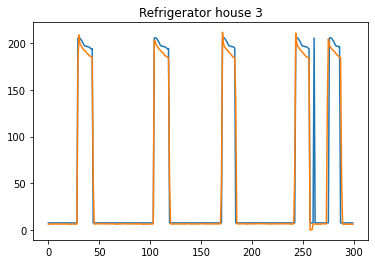

In [63]:
plotting_good_pred_segment(refg_pred, final_y, 3600, 3900, "Refrigerator house 3")